In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math 
from prettytable import PrettyTable
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    recall_score
)

#Data Pre processing
#read file from csv
mydata = pd.read_csv("final.csv")
#get featrues and labels
X = mydata.iloc[:,1:]
y = mydata["isFraud"]
from sklearn.preprocessing import StandardScaler
# FEATURE SCALING
sc = StandardScaler()
X = sc.fit_transform(X)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=80) 
# calculate entropy for each features
names=mydata.columns.values
def calc_entropy(column): 
 
 # Compute the counts of each unique value in the column 
 counts = np.bincount(column) 
 # Divide by the length of the column to get the probability 
 probabilities = counts / len(column) 
 
 entropy = 0 
 # Loop through the probabilities and add to the total entropy 
 for prob in probabilities: 
  if prob > 0: 
 # use log from math and set base to 2 
    entropy += prob * math.log(prob, 2) 
 
 return -entropy
def calc_entropy2(data, feature_name, target_name): 
    #Find the unique values in the column “feature_name”
    values = data[feature_name].unique()

    entropy=0
    for i in values:
        a = data[data[feature_name] == i]
        prob = (a.shape[0] / data.shape[0])
        entropy += prob*calc_entropy(a[target_name])

    return entropy
raw_entropies = [];
entropies = [];
for name in names[0:-1]:
    e = calc_entropy2(mydata,name,'isFraud')
    entropies.append(e)
    raw_entropies.append(e)
entropies.sort(reverse = False)

entropy_sorted_indexs = []
entropy_sorted_names = []
for i in range(0,173):
    entropy_sorted_indexs.append(raw_entropies.index(entropies[i]))
    entropy_sorted_names.append(names[raw_entropies.index(entropies[i])])
print("---------Table for entropy-------------")
print("feature name       entropy value")
table = PrettyTable(['feature name','entropy value'])
for i in range (0,173):
 str1='%f'%entropies[i]
 table.add_row([entropy_sorted_names[i],str1])
print(table)


---------Table for entropy-------------
feature name       entropy value
+----------------+---------------+
|  feature name  | entropy value |
+----------------+---------------+
|    isFraud     |    0.000000   |
|      V307      |    0.246847   |
|     card1      |    0.273154   |
|      V308      |    0.285518   |
|      V310      |    0.287751   |
|      V127      |    0.296998   |
|      V317      |    0.315376   |
|      V130      |    0.330880   |
|      V312      |    0.335605   |
|      V314      |    0.336106   |
|      V128      |    0.337987   |
|      V133      |    0.350063   |
|      V318      |    0.350210   |
|      V315      |    0.352584   |
|     dist1      |    0.365145   |
|      V313      |    0.373399   |
|      V306      |    0.373543   |
|      V131      |    0.378026   |
|      V134      |    0.380161   |
|     card2      |    0.384096   |
|      D11       |    0.387764   |
|       D4       |    0.392590   |
|      D10       |    0.394520   |
|      V126      

In [32]:
# Logistic Regression
ModelName = "Logistic Regression"
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
# FIT/TRAIN MODEL
classifier = LogisticRegression(max_iter=2000)
#cross val
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = 10
#Score
results = cross_validate(estimator=classifier,X=X,y=y,cv=kfold,scoring=scoring)
precision = np.mean(results['test_precision'])
recall = np.mean(results['test_recall'])
f1 = np.mean(results['test_f1_score'])

print("Model name:", ModelName)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")





Model name: Logistic Regression
Precision: 0.5526294060224239
Recall: 0.23827044025157235
F1 Score: 0.3284464401382826




In [20]:

# SVM
ModelName = "SVM"
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Linear Kernel
#Train the model using the training sets
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = 10
#Score
results = cross_validate(estimator=clf,X=X,y=y,cv=kfold,scoring=scoring)
precision = np.mean(results['test_precision'])
recall = np.mean(results['test_recall'])
f1 = np.mean(results['test_f1_score'])

print("Model name:", ModelName)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")




Model name: SVM
Precision: 0.804610193881517
Recall: 0.4223231132075472
F1 Score: 0.5350497986123804




In [10]:
# multi-layer perceptron classifiers
ModelName = "multi-layer perceptron classifiers"
from sklearn.neural_network import MLPClassifier
mlp_clf  = MLPClassifier(random_state=1, max_iter=1000)

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = 10
#Score
results = cross_validate(estimator=mlp_clf,X=X,y=y,cv=kfold,scoring=scoring)
precision = np.mean(results['test_precision'])
recall = np.mean(results['test_recall'])
f1 = np.mean(results['test_f1_score'])

print("Model name:", ModelName)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")




Model name: multi-layer perceptron classifiers
Precision: 0.6525175638547711
Recall: 0.5019221698113208
F1 Score: 0.5640237927896397




In [9]:

#GradientBoostingClassifier
ModelName = "Gradient Boosting Classifier"
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = 10
#Score
results = cross_validate(estimator=gbc,X=X,y=y,cv=kfold,scoring=scoring)
precision = np.mean(results['test_precision'])
recall = np.mean(results['test_recall'])
f1 = np.mean(results['test_f1_score'])

print("Model name:", ModelName)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")


Model name: Gradient Boosting Classifier
Precision: 0.7835748597849829
Recall: 0.3349606918238994
F1 Score: 0.46458198236679626




In [11]:

#naive bayes
ModelName = "Naive Bayes"
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = 10
#Score
results = cross_validate(estimator=NB,X=X,y=y,cv=kfold,scoring=scoring)
precision = np.mean(results['test_precision'])
recall = np.mean(results['test_recall'])
f1 = np.mean(results['test_f1_score'])

print("Model name:", ModelName)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")


Model name: Naive Bayes
Precision: 0.25901979504639455
Recall: 0.5652555031446542
F1 Score: 0.35005056144069235




In [28]:


# Random Forest Classifier
ModelName = "Random Forest Classifier"
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = 10
#Score
results = cross_validate(estimator=rf,X=X,y=y,cv=kfold,scoring=scoring)
precision = np.mean(results['test_precision'])
recall = np.mean(results['test_recall'])
f1 = np.mean(results['test_f1_score'])

print("Model name:", ModelName)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")




Model name: Random Forest Classifier
Precision: 0.8238807088822868
Recall: 0.27982704402515723
F1 Score: 0.4139068244404801




In [13]:
# DecisionTreeClassifier
ModelName = "Decision Tree Classifier"
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
DTC = DecisionTreeClassifier()
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = 10
#Score
results = cross_validate(estimator=DTC,X=X,y=y,cv=kfold,scoring=scoring)
precision = np.mean(results['test_precision'])
recall = np.mean(results['test_recall'])
f1 = np.mean(results['test_f1_score'])

print("Model name:", ModelName)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")



Model name: Decision Tree Classifier
Precision: 0.4806501717260316
Recall: 0.48371069182389936
F1 Score: 0.48106285414134586




In [14]:

# KNN
ModelName = "KNN"
from sklearn.neighbors import KNeighborsClassifier
# FIT/TRAIN MODEL
kNN = KNeighborsClassifier(n_neighbors=2) 
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = 10
#Score
results = cross_validate(estimator=kNN,X=X,y=y,cv=kfold,scoring=scoring)
precision = np.mean(results['test_precision'])
recall = np.mean(results['test_recall'])
f1 = np.mean(results['test_f1_score'])

print("Model name:", ModelName)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")





Model name: KNN
Precision: 0.775789713430939
Recall: 0.3978066037735849
F1 Score: 0.5236309158494784




In [1]:

# Import train_test_split function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math 
from prettytable import PrettyTable
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    recall_score
)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

#Data Pre processing
#read file from csv
mydata = pd.read_csv("final.csv")
#get featrues and labels
X = mydata.iloc[:,1:]
y = mydata["isFraud"]
from sklearn.preprocessing import StandardScaler
# FEATURE SCALING
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=80) 
#RNN
ModelName = "ANN"
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import load_model
from random import randrange
import numpy as np

def evaluate_model(model,X, y):
    # 在每次交叉验证迭代中统计评估指标的值
    a1=[]
    a2=[]
    a3=[]
    # 分割数据集
    k = 10
    n = X.shape[0]
    fold_size = n // k
   
    for fold in range(k):
        # 获取训练集和测试集
        X_train = np.concatenate([X[:fold * fold_size], X[(fold + 1) * fold_size:]])
        y_train = np.concatenate([y[:fold * fold_size], y[(fold + 1) * fold_size:]])
        X_test = X[fold * fold_size:(fold + 1) * fold_size]
        y_test = y[fold * fold_size:(fold + 1) * fold_size]
        # 训练模型
        # 计算模型在测试集上的性能
        ann.fit(X_train,y_train,batch_size=32,epochs = 20)
        y_pred = ann.predict(X_test,verbose=0)
        y_pred_binary  = []
        myLength = len(y_pred)
        for i in range(myLength):
            nowblock = y_pred[i]
            if(nowblock < 0.5):
                y_pred_binary.append(0) 
            else:
                y_pred_binary.append(1) 
        precision = precision_score( y_test.tolist(), y_pred_binary)
        recall=recall_score(y_test.tolist(),  y_pred_binary)
        f1 = f1_score( y_test.tolist(),  y_pred_binary)
        a1.append( precision)
        a2.append(recall)
        a3.append(f1)
    return a1,a2,a3
# test cross validation split
ann = Sequential()
ann.add(Dense(units=157,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
res=evaluate_model(ann,X, y)
precision = np.mean(res[0])
recall = np.mean(res[1])
f1 = np.mean(res[2])

print("Model name:", ModelName)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
#print("\n")




Epoch 1/20
436/436 [==============================] - 1s 860us/step - loss: 0.1291 - accuracy: 0.9660
Epoch 2/20
436/436 [==============================] - 0s 913us/step - loss: 0.0879 - accuracy: 0.9755
Epoch 3/20
436/436 [==============================] - 0s 850us/step - loss: 0.0738 - accuracy: 0.9787
Epoch 4/20
436/436 [==============================] - 0s 837us/step - loss: 0.0621 - accuracy: 0.9819
Epoch 5/20
436/436 [==============================] - 0s 921us/step - loss: 0.0532 - accuracy: 0.9843
Epoch 6/20
436/436 [==============================] - 0s 849us/step - loss: 0.0452 - accuracy: 0.9865
Epoch 7/20
436/436 [==============================] - 0s 848us/step - loss: 0.0382 - accuracy: 0.9895
Epoch 8/20
436/436 [==============================] - 0s 911us/step - loss: 0.0347 - accuracy: 0.9900
Epoch 9/20
436/436 [==============================] - 0s 846us/step - loss: 0.0300 - accuracy: 0.9912
Epoch 10/20
436/436 [==============================] - 0s 839us/step - loss: 0.026

436/436 [==============================] - 0s 782us/step - loss: 0.0037 - accuracy: 0.9991
Epoch 1/20
436/436 [==============================] - 0s 910us/step - loss: 0.0052 - accuracy: 0.9986
Epoch 2/20
436/436 [==============================] - 0s 792us/step - loss: 0.0086 - accuracy: 0.9980
Epoch 3/20
436/436 [==============================] - 0s 779us/step - loss: 0.0156 - accuracy: 0.9966
Epoch 4/20
436/436 [==============================] - 0s 890us/step - loss: 0.0146 - accuracy: 0.9961
Epoch 5/20
436/436 [==============================] - 0s 819us/step - loss: 0.0087 - accuracy: 0.9980
Epoch 6/20
436/436 [==============================] - 0s 789us/step - loss: 0.0188 - accuracy: 0.9958
Epoch 7/20
436/436 [==============================] - 0s 853us/step - loss: 0.0084 - accuracy: 0.9988
Epoch 8/20
436/436 [==============================] - 0s 874us/step - loss: 0.0054 - accuracy: 0.9989
Epoch 9/20
436/436 [==============================] - 0s 777us/step - loss: 0.0049 - accuracy

436/436 [==============================] - 0s 861us/step - loss: 0.0260 - accuracy: 0.9946
Epoch 20/20
436/436 [==============================] - 0s 786us/step - loss: 0.0121 - accuracy: 0.9976
Epoch 1/20
436/436 [==============================] - 0s 791us/step - loss: 0.0037 - accuracy: 0.9993
Epoch 2/20
436/436 [==============================] - 0s 879us/step - loss: 0.0012 - accuracy: 0.9999
Epoch 3/20
436/436 [==============================] - 0s 788us/step - loss: 4.7397e-04 - accuracy: 1.0000
Epoch 4/20
436/436 [==============================] - 0s 780us/step - loss: 3.9469e-04 - accuracy: 1.0000
Epoch 5/20
436/436 [==============================] - 0s 850us/step - loss: 4.1189e-04 - accuracy: 1.0000
Epoch 6/20
436/436 [==============================] - 0s 830us/step - loss: 3.6277e-04 - accuracy: 1.0000
Epoch 7/20
436/436 [==============================] - 0s 792us/step - loss: 5.8426e-04 - accuracy: 0.9999
Epoch 8/20
436/436 [==============================] - 0s 777us/step - lo

D:\anacoda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\reyze\AppData\Local\Temp\ipykernel_60776\4082175501.py:32: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=palette[colors.astype(np.int)])


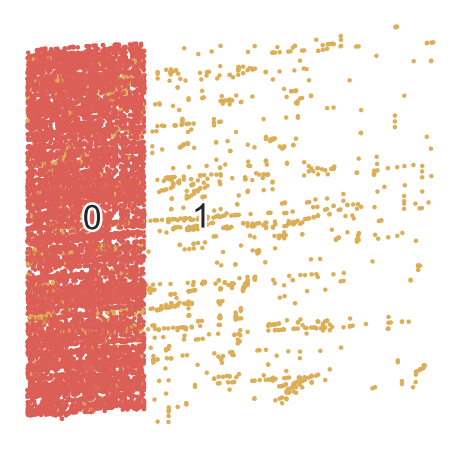

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold,datasets
mydata = pd.read_csv("final3.csv")
#get featrues and labels
X = mydata.iloc[:,1:]
y = mydata["isFraud"]
import numpy as np
from sklearn.manifold import TSNE

# Random state.
RS = 20230409

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('YlGn')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=20,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(2):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=34)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


"""
X: raw data, 
y: labels
"""

digits_proj = TSNE(n_components=2, init='pca',random_state=RS).fit_transform(X)

scatter(digits_proj, y)
foo_fig = plt.gcf() # 'get current figure'
foo_fig.savefig('demo.eps', format='eps', dpi=1000)
plt.show()
